In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [24]:
train_data= pd.read_csv('train.csv')
train_data.sample(9)

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
20957,3,0,3,0,1,So just chill hoe
20530,3,0,2,1,1,Riding wit my old dude .. Dis nicca bangin #Fr...
10497,3,0,3,0,1,I hate when bitches think you expect something...
24707,3,1,2,0,1,will u love dat nigga even if he lose it all.....
14809,3,1,2,0,1,RT @CuhCuhCuh: I got NO love for bitches or bi...
19383,3,0,0,3,2,RT @jrsalzman: Buzzfeed males who live in the ...
8882,3,0,3,0,1,Dudes stay trying to hit on someone elses bitc...
453,3,0,3,0,1,"""HOW DO YOU KNOW MY TWITTER PASSWORD"" bitch pl..."
6109,6,2,4,0,1,@iAM_tRoyal5 @Briscoefunnyguy @I_GotOne @_Kaee...


<Axes: xlabel='class'>

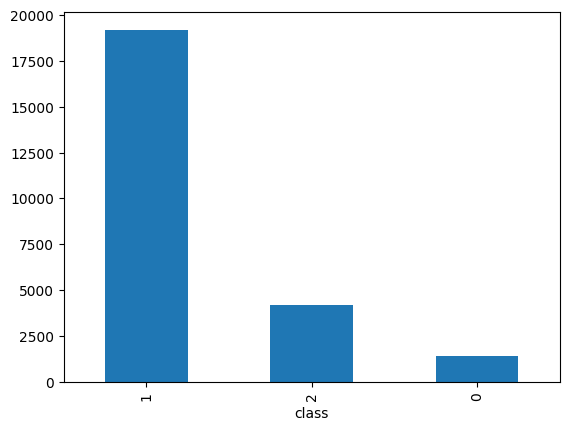

In [25]:
''' 0 : Hate speech
    1 : offensive_language
    2 : Neither hate nor offencive 
'''
train_data['class'].value_counts().plot(kind='bar')

<Axes: xlabel='count'>

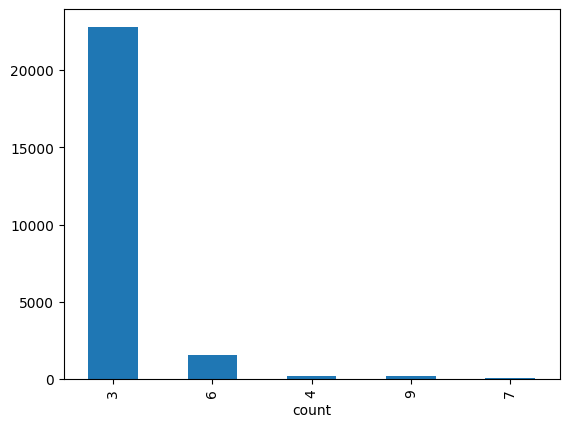

In [26]:
''' Count of annotations '''
train_data['count'].value_counts().plot(kind='bar')

<Axes: xlabel='hate_speech_count'>

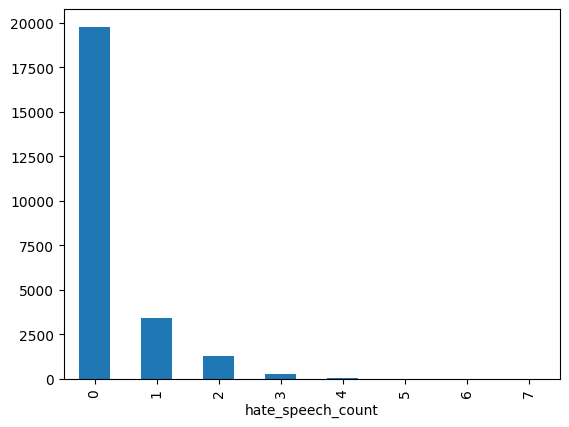

In [27]:
train_data['hate_speech_count'].value_counts().plot(kind='bar')

<Axes: xlabel='offensive_language_count'>

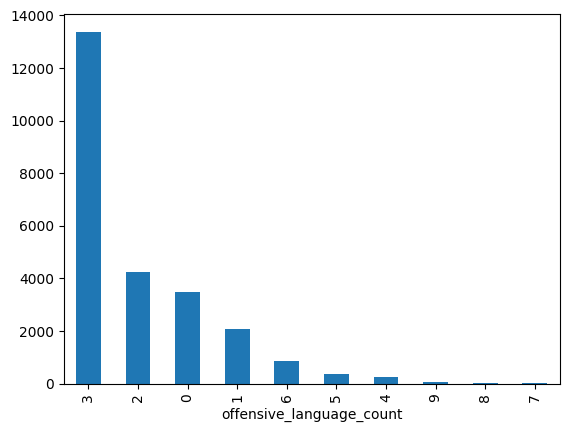

In [28]:
train_data['offensive_language_count'].value_counts().plot(kind='bar')

<Axes: xlabel='neither_count'>

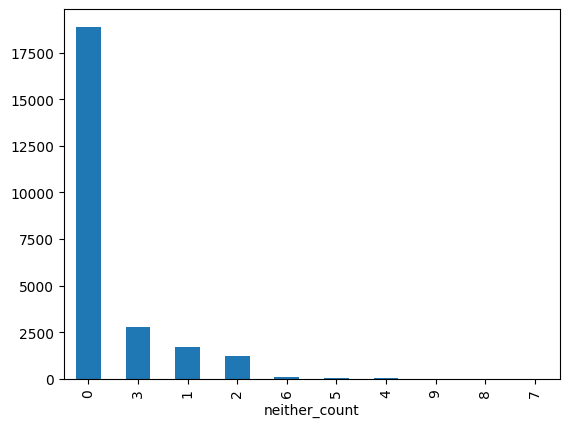

In [29]:
train_data['neither_count'].value_counts().plot(kind='bar')

## Clean the data
1. Remove the annotation.(!!)
2. Remove the username.
3. Remove the url.
4. Remove random no. like(&#128514)

In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
stopword_set = stopwords.words('english')
lemma = WordNetLemmatizer()


In [31]:
def remove_stopword_lemmatize(sent):
    sent = word_tokenize(sent)
    new_sent = ''
    for word in sent:
        if word not in stopword_set:
            new_sent+=lemma.lemmatize(word,pos='v')+ ' '
    return new_sent

In [32]:
def clean_tweet(x):
    pattern = r'@\w*\b'
    no_pattern = r'&#\w*\b'
    x = re.sub(no_pattern,'',x)
    x = re.sub(pattern,'',x)
    x = x.replace('RT ','')
    x = x.replace('NFN ','')
    x = re.sub(r'[|!:";\'\.*~,\-?]','',x)
    return x

In [33]:
train_data['tweet'] = train_data['tweet'].apply(clean_tweet)
train_data['tweet'] = train_data['tweet'].apply(lambda x:x.lower())

In [34]:
train_data['tweet'] = train_data['tweet'].apply(remove_stopword_lemmatize)

In [35]:
labels = train_data['class']
train_data.drop('class',axis=1,inplace=True)

## Split the dataset

In [37]:
train_data['tweet']

0        woman shouldnt complain clean house & amp man ...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2             dawg ever fuck bitch start cry confuse shit 
3                                        look like tranny 
4          shit hear might true might faker bitch tell ya 
                               ...                        
24778    yous muthafin lie right tl trash mine bible sc...
24779    youve go break wrong heart baby drive redneck ...
24780    young buck wan na eat dat nigguh like aint fuc...
24781                      youu get wild bitch tellin lie 
24782    ruffle ntac eileen dahlia beautiful color comb...
Name: tweet, Length: 24783, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(train_data,labels,test_size=0.2)

### Define and make model
- create token of words
- convert token into embedding
- use this token to train our model

In [39]:
def get_max_len(t):
    max_len = 0
    total_words = []
    for i in t:
        max_len = max(max_len,len(i.split(' ')))
        total_words.extend(i.split(' '))
    return max_len,len(set(total_words))

max_len,total_words = get_max_len(list(train_data['tweet']))
max_len,total_words

(41, 22563)

In [40]:
from tensorflow.keras.layers import TextVectorization,Embedding
import tensorflow
tensorflow.random.set_seed(42)

text_vector = TextVectorization(max_tokens=total_words,
                                output_mode = 'int',
                                output_sequence_length = max_len,
                                split = 'whitespace',
                                standardize = 'lower_and_strip_punctuation')

In [41]:
text_embedding = Embedding(input_dim = total_words,
                           input_length = max_len,
                           output_dim=128)

In [42]:
text_vector.adapt(train_data['tweet'])

In [43]:
text_vector([clean_tweet(train_data.loc[159,'tweet'])])

<tf.Tensor: shape=(1, 41), dtype=int64, numpy=
array([[ 5138,  5138,  3708,  1123,   149,  1575, 10885,  4902,  1132,
           17, 21698,   199,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int64)>

In [44]:
text_embedding(text_vector([clean_tweet(train_data.loc[159,'tweet'])]))

<tf.Tensor: shape=(1, 41, 128), dtype=float32, numpy=
array([[[-0.01344587, -0.04283437, -0.03548784, ..., -0.03626213,
          0.03937991,  0.03994626],
        [-0.01344587, -0.04283437, -0.03548784, ..., -0.03626213,
          0.03937991,  0.03994626],
        [ 0.01535926,  0.03210765, -0.03432342, ...,  0.00272598,
          0.03416265,  0.01311108],
        ...,
        [-0.01908718,  0.03372705,  0.00665418, ..., -0.03826704,
         -0.00867229,  0.03287416],
        [-0.01908718,  0.03372705,  0.00665418, ..., -0.03826704,
         -0.00867229,  0.03287416],
        [-0.01908718,  0.03372705,  0.00665418, ..., -0.03826704,
         -0.00867229,  0.03287416]]], dtype=float32)>

In [45]:
x_tweet = x_train['tweet']
y_tweet = y_train['tweet']
# x_test = tensorflow.one_hot(x_test, 3)
# y_test = tensorflow.one_hot(y_test, 3)

In [46]:
from tensorflow.keras.layers import LSTM,Input,Dense,Dropout

input = Input(shape=(1,),dtype='string')
x = text_vector(input)
x = text_embedding(x)
x = LSTM(32,activation='tanh')(x)
x = Dropout(0.5)(x)
x = Dense(16,activation='tanh')(x)
x = Dropout(0.5)(x)
output = Dense(3,activation='softmax')(x)

model = tensorflow.keras.Model(input,output,name='LSTM_model')


In [47]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 41)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 41, 128)           2888064   
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                        

In [49]:
model_hist = model.fit(x_tweet,x_test,epochs=10,batch_size=32,validation_data=(y_tweet,y_test))

Epoch 1/10

620/620 [==============================] - 31s 44ms/step - loss: 0.7031 - accuracy: 0.7673 - val_loss: 0.4525 - val_accuracy: 0.8650
Epoch 2/10
620/620 [==============================] - 26s 42ms/step - loss: 0.4617 - accuracy: 0.8424 - val_loss: 0.4317 - val_accuracy: 0.8600
Epoch 3/10
620/620 [==============================] - 26s 41ms/step - loss: 0.4353 - accuracy: 0.8556 - val_loss: 0.4353 - val_accuracy: 0.8673
Epoch 4/10
620/620 [==============================] - 26s 41ms/step - loss: 0.4792 - accuracy: 0.8676 - val_loss: 0.4796 - val_accuracy: 0.8606
Epoch 5/10
620/620 [==============================] - 25s 41ms/step - loss: 0.4720 - accuracy: 0.8677 - val_loss: 0.4634 - val_accuracy: 0.8636
Epoch 6/10
620/620 [==============================] - 25s 41ms/step - loss: 0.5058 - accuracy: 0.8205 - val_loss: 0.4182 - val_accuracy: 0.8372
Epoch 7/10
620/620 [==============================] - 26s 41ms/step - loss: 0.4311 - accuracy: 0.8382 - val_loss: 0.4121 - val_accuracy

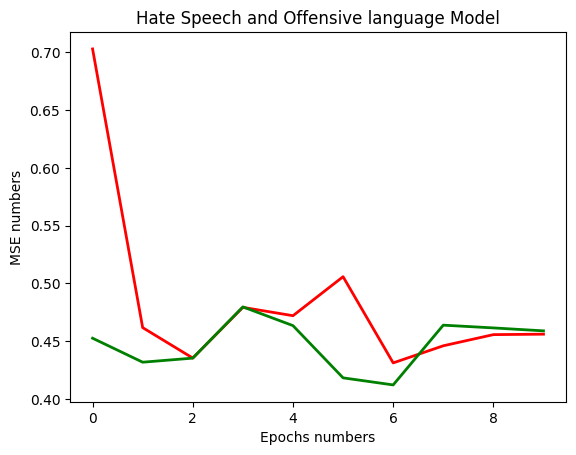

In [50]:
hist = model.history.history
plt.plot(hist['loss'],'r',linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('Hate Speech and Offensive language Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [28]:
model.save("hate_speech_detection_model")

INFO:tensorflow:Assets written to: hate_speech_detection_model\assets


INFO:tensorflow:Assets written to: hate_speech_detection_model\assets


In [29]:
model.predict(["you are a great person."])

1/1 [==============================] - 1s 939ms/step


array([[0.01622369, 0.08707634, 0.8967    ]], dtype=float32)